In [418]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Calculate the number of high temperature days at different temperatures for all cities in each year and predict the number of high temperature days in the following years

In [ ]:
# Read dataset with 28 degree 

In [419]:
data_28 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax28-tabular/wbgtmax28_STATS.csv')
data_28.head()

,Unnamed: 0,ID_HDC_G0,year,duration,avg_temp,avg_intensity,tot_intensity,event_dates,intensity,tmax,UID,CTR_MN_NM,UC_NM_MN,GCPNT_LAT,GCPNT_LON,region,sub-region,intermediate-region
0,0,11665,1983,2,28.276445,0.276444,0.552889,"['1983.05.21', '1983.05.22']","[0.327826, 0.22506299999999999]","[28.327826, 28.225063]",UID-0,China,Xidu [CHN],26.968154,112.379154,Asia,Eastern Asia,Eastern Asia
1,1,11665,1983,2,29.734601,1.734601,3.469202,"['1983.05.31', '1983.06.01']","[2.265625, 1.203577]","[30.265625, 29.203577]",UID-1,China,Xidu [CHN],26.968154,112.379154,Asia,Eastern Asia,Eastern Asia
2,2,11665,1983,9,29.102297,1.102297,9.920674,"['1983.06.22', '1983.06.23', '1983.06.24', '19...","[0.127764, 0.8096869999999999, 1.647028, 1.389...","[28.127764, 28.809687, 29.647028, 29.389565, 2...",UID-2,China,Xidu [CHN],26.968154,112.379154,Asia,Eastern Asia,Eastern Asia
3,3,11665,1983,2,28.271723,0.271723,0.543446,"['1983.07.03', '1983.07.04']","[0.445026, 0.09842000000000001]","[28.445026, 28.09842]",UID-3,China,Xidu [CHN],26.968154,112.379154,Asia,Eastern Asia,Eastern Asia
4,4,11665,1983,1,28.322758,0.322758,0.322758,['1983.07.06'],[0.322758],[28.322758],UID-4,China,Xidu [CHN],26.968154,112.379154,Asia,Eastern Asia,Eastern Asia


In [ ]:
# Combines data according to the year, adds the duration of the same year, and then converts the result into a dictionary

In [420]:
result = data_28.groupby('year')['duration'].sum()
total_year_28 = result.to_dict()

In [421]:
data_30 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax30-tabular/wbgtmax30_STATS.csv')
result = data_30.groupby('year')['duration'].sum()
total_yeat_30 = result.to_dict()

In [422]:
data_32 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax32-tabular/wbgtmax32_STATS.csv')
result = data_32.groupby('year')['duration'].sum()
total_yeat_32 = result.to_dict()

In [423]:
data_406 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/himax406_2d-tabular/himax406_2d_STATS.csv')
result = data_406.groupby('year')['duration'].sum()
total_yeat_406 = result.to_dict()

In [424]:
data_461 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/himax461-tabular/himax461_STATS.csv')
result = data_461.groupby('year')['duration'].sum()
total_yeat_461 = result.to_dict()

In [425]:
min(list(total_yeat_461.values()))

43099

In [426]:
max(list(total_year_28.values()))

1115203

In [ ]:
# Draw a line chart based on five sets of data

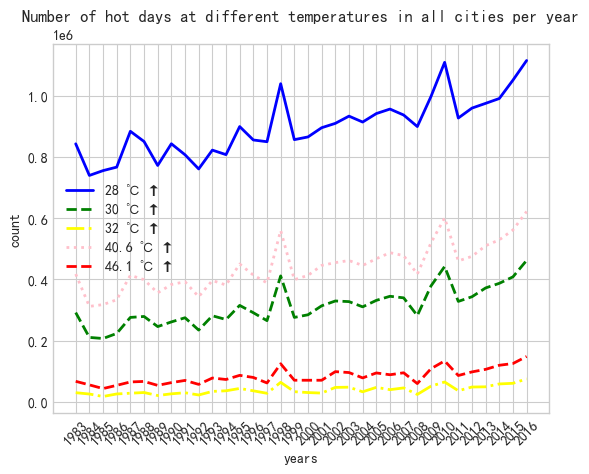

In [427]:
x = [i for i in range(1983, 2017)]
y1 = list(total_year_28.values())
y2 = list(total_yeat_30.values())
y3 = list(total_yeat_32.values())
y4 = list(total_yeat_406.values())
y5 = list(total_yeat_461.values())

plt.plot(x, y1, label='28 ℃ ↑', color='blue', linewidth=2, linestyle='solid')
plt.plot(x, y2, label='30 ℃ ↑', color='green', linewidth=2, linestyle='dashed')
plt.plot(x, y3, label='32 ℃ ↑', color='yellow', linewidth=2, linestyle='dashdot')
plt.plot(x, y4, label='40.6 ℃ ↑', color='pink', linewidth=2, linestyle='dotted')
plt.plot(x, y5, label='46.1 ℃ ↑', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('Number of hot days at different temperatures in all cities per year')
plt.legend()

plt.xticks([i for i in range(1983, 2017)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [428]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [ ]:
# Normalization

In [429]:
scaler = MinMaxScaler(feature_range=(0,1))
year_28_scaled = scaler.fit_transform(np.array(list(total_year_28.values())).reshape(-1,1))
year_30_scaled = scaler.transform(np.array(list(total_yeat_30.values())).reshape(-1,1))
year_32_scaled = scaler.transform(np.array(list(total_yeat_32.values())).reshape(-1,1))
year_406_scaled = scaler.transform(np.array(list(total_yeat_406.values())).reshape(-1,1))
year_461_scaled = scaler.transform(np.array(list(total_yeat_461.values())).reshape(-1,1))

In [ ]:
# Train with RNN model

In [430]:
# Split data (by year)
train_size = int(len(year_28_scaled) * 0.8)
test_size = len(year_28_scaled) - train_size
train, test = year_28_scaled[0:train_size,:], year_28_scaled[train_size:len(year_28_scaled),:]
print(len(train), len(test))

# Convert data format
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape data[samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Train with RNN
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01))
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

27 7
Epoch 1/50


E:\Conda_data\envs\tf_keras_py38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 - 1s - loss: 0.1647 - 536ms/epoch - 21ms/step
Epoch 2/50
26/26 - 0s - loss: 0.0483 - 21ms/epoch - 807us/step
Epoch 3/50
26/26 - 0s - loss: 0.0394 - 21ms/epoch - 814us/step
Epoch 4/50
26/26 - 0s - loss: 0.0367 - 22ms/epoch - 853us/step
Epoch 5/50
26/26 - 0s - loss: 0.0353 - 21ms/epoch - 805us/step
Epoch 6/50
26/26 - 0s - loss: 0.0339 - 22ms/epoch - 844us/step
Epoch 7/50
26/26 - 0s - loss: 0.0332 - 20ms/epoch - 780us/step
Epoch 8/50
26/26 - 0s - loss: 0.0311 - 21ms/epoch - 820us/step
Epoch 9/50
26/26 - 0s - loss: 0.0317 - 22ms/epoch - 839us/step
Epoch 10/50
26/26 - 0s - loss: 0.0333 - 21ms/epoch - 821us/step
Epoch 11/50
26/26 - 0s - loss: 0.0306 - 20ms/epoch - 754us/step
Epoch 12/50
26/26 - 0s - loss: 0.0305 - 21ms/epoch - 802us/step
Epoch 13/50
26/26 - 0s - loss: 0.0307 - 21ms/epoch - 825us/step
Epoch 14/50
26/26 - 0s - loss: 0.0333 - 22ms/epoch - 852us/step
Epoch 15/50
26/26 - 0s - loss: 0.0319 - 21ms/epoch - 821us/step
Epoch 16/50
26/26 - 0s - loss: 0.0324 - 21ms/epoch - 805us/s

In [ ]:
# Forecast past data from 1983-2016

In [431]:
prediction=model.predict(year_28_scaled.reshape(-1,1,1))
# prediction
prediction_copies_array = np.repeat(prediction,1, axis=-1)
pred_past=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]
pred_past

2/2 [==============================] - 0s 2ms/step


array([865779.56, 801799.  , 811943.25, 819269.3 , 888428.3 , 870114.5 ,
       822720.3 , 865849.3 , 844491.25, 815475.44, 853680.4 , 844744.7 ,
       896475.1 , 872929.56, 869710.2 , 954616.25, 873528.5 , 878486.5 ,
       894545.9 , 901748.9 , 913095.06, 903875.5 , 916937.  , 923479.5 ,
       914778.4 , 896510.9 , 940044.7 , 974021.3 , 910192.7 , 924822.9 ,
       931306.8 , 937569.75, 958287.94, 975449.8 ], dtype=float32)

In [ ]:
# Predict the data for the next 9 years. Due to the normalization of the maximum and minimum values, all the data is in the range of (0,1), so the predicted data needs to be restored with inverse_transform

In [432]:
# np.array([1115203]).reshape(-1,1)
# last_value = np.array([1115203]).reshape(-1,1) 
pre_future = [np.array([1115203]).reshape(-1,1)]
for i in range(9):
    last_value = scaler.transform(pre_future[-1]) 
    last_value = last_value.reshape((-1,1,1)) 
    prediction = model.predict(last_value) # Predict with RNN
    prediction_copies_array = np.repeat(prediction,1, axis=-1)
    pred_f=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]
    pre_future.append(pred_f.reshape(-1,1))
pre_future

1/1 [==============================] - 0s 17ms/step


[array([[1115203]]),
 array([[975449.8]], dtype=float32),
 array([[931422.7]], dtype=float32),
 array([[912184.56]], dtype=float32),
 array([[902945.1]], dtype=float32),
 array([[898332.]], dtype=float32),
 array([[895986.9]], dtype=float32),
 array([[894784.06]], dtype=float32),
 array([[894164.5]], dtype=float32),
 array([[893844.6]], dtype=float32)]

In [ ]:
# Convert the predicted data into a one-dimensional list

In [433]:
pre_future_list = []
for item in pre_future:
    pre_future_list.append(item.tolist()[0][0])

In [ ]:
# plot true and predict values

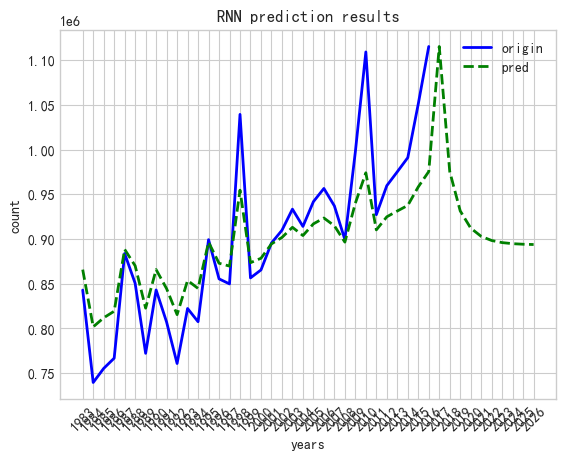

In [434]:
x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2027)]
y1 = list(total_year_28.values())
y2 = pred_past.tolist() + pre_future_list

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('RNN prediction results')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [435]:
year_28_scaled.shape

(34, 1)

In [ ]:
# linear regression

In [436]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y = year_28_scaled

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model 
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X)


In [ ]:
# Predict past value

In [437]:
prediction_copies_array = np.repeat(y_pred,1, axis=-1)
pred_past=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(y_pred),1)))[:,0]
pred_past

array([ 770239.7761062 ,  778363.71327434,  786487.65044248,
        794611.58761062,  802735.52477876,  810859.4619469 ,
        818983.39911504,  827107.33628319,  835231.27345133,
        843355.21061947,  851479.14778761,  859603.08495575,
        867727.02212389,  875850.95929204,  883974.89646018,
        892098.83362832,  900222.77079646,  908346.7079646 ,
        916470.64513275,  924594.58230089,  932718.51946903,
        940842.45663717,  948966.39380531,  957090.33097345,
        965214.26814159,  973338.20530974,  981462.14247788,
        989586.07964602,  997710.01681416, 1005833.9539823 ,
       1013957.89115044, 1022081.82831858, 1030205.76548673,
       1038329.70265487])

In [ ]:
# plot true value and predicted value

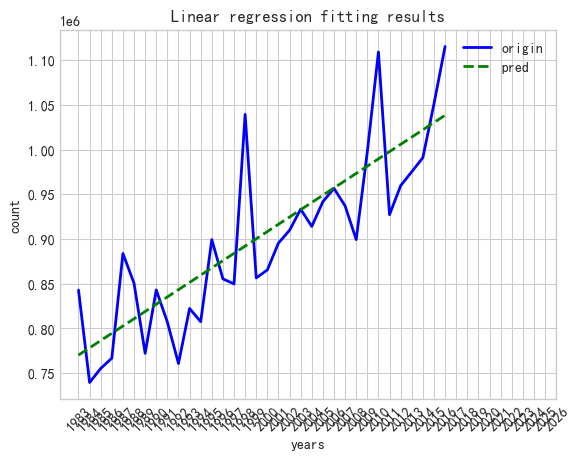

In [438]:
x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2017)]
y1 = list(total_year_28.values())
y2 = pred_past.tolist()

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('Linear regression fitting results')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [ ]:
# predict future value

In [193]:
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_future = regressor.predict(data)
prediction_copies_array_future = np.repeat(y_pred_future,1, axis=-1)
pred_future=scaler.inverse_transform(np.reshape(prediction_copies_array_future,(len(y_pred_future),1)))[:,0]

In [ ]:
# plot true value and predicted value

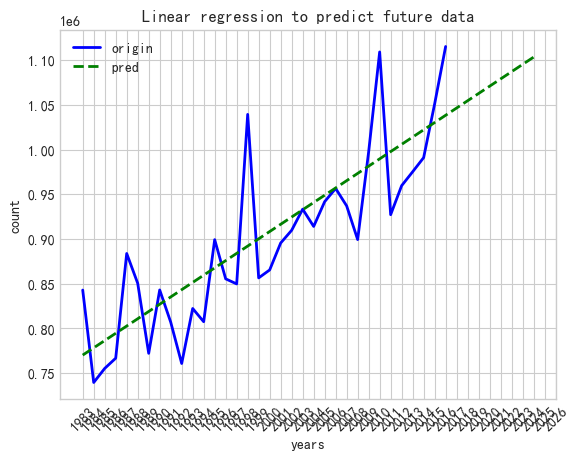

In [439]:
x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_year_28.values())
y2 = pred_future.tolist()

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('Linear regression to predict future data')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [ ]:
# get the predicted minimum for each year

In [195]:
y2_low = []
for item in y2:
    y2_low.append(item - (y2[9]-y1[9]))

In [ ]:
# get the predicted maximum for each year

In [196]:
y2_high = []
for item in y2:
    y2_high.append(item + (y1[15]-y2[15]))

In [ ]:
# plot true/predicted value, predict maximum/minimum value

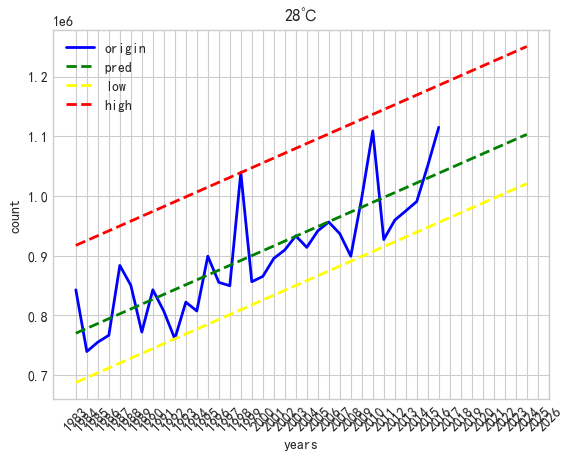

In [440]:
x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_year_28.values())
y2 = pred_future.tolist()
y3 = y2_low
y4 = y2_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y2_low, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y2_high, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('28℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [441]:
X_30 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_30 = year_30_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.2, random_state=0)

# train with model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_30 = regressor.predict(data)

prediction_copies_array_30 = np.repeat(y_pred_30,1, axis=-1)
pred_past_30=scaler.inverse_transform(np.reshape(prediction_copies_array_30,(len(y_pred_30),1)))[:,0]

In [442]:
pred_past_30.shape

(42,)

In [ ]:
# with different dataset with different temperature

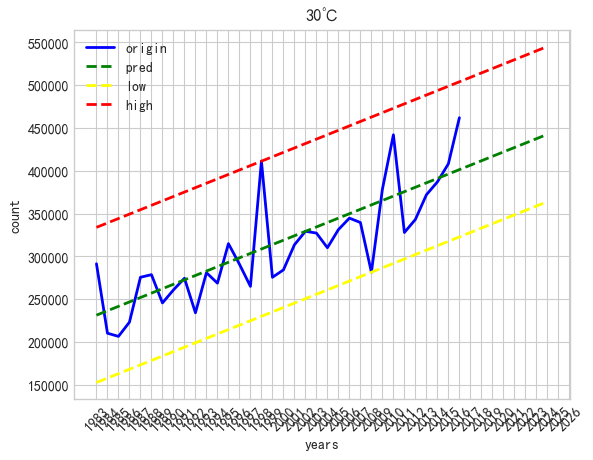

In [443]:
y2_30_low = []
for item in pred_past_30.tolist():
    y2_30_low.append(item - (pred_past_30.tolist()[25]-list(total_yeat_30.values())[25]))

y2_30_high = []
for item in pred_past_30.tolist():
    y2_30_high.append(item + (list(total_yeat_30.values())[15]-pred_past_30.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_yeat_30.values())
y2 = pred_past_30.tolist()
y3 = y2_30_low
y4 = y2_30_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('30℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [444]:
X_32 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_32 = year_32_scaled

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_32, y_32, test_size=0.2, random_state=0)

# train with model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_32 = regressor.predict(data)

prediction_copies_array_32 = np.repeat(y_pred_32,1, axis=-1)
pred_past_32=scaler.inverse_transform(np.reshape(prediction_copies_array_32,(len(y_pred_32),1)))[:,0]

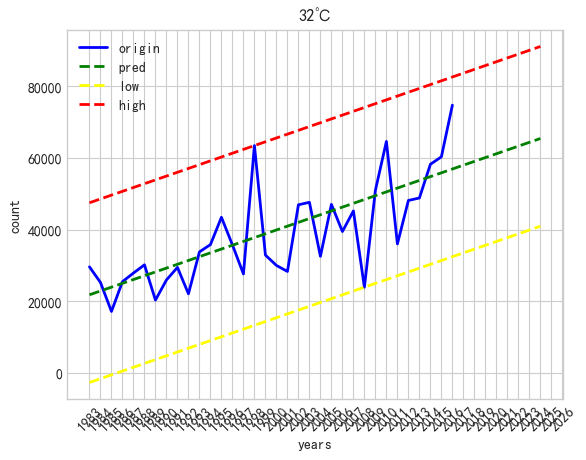

In [445]:
y2_32_low = []
for item in pred_past_32.tolist():
    y2_32_low.append(item - (pred_past_32.tolist()[25]-list(total_yeat_32.values())[25]))

y2_32_high = []
for item in pred_past_32.tolist():
    y2_32_high.append(item + (list(total_yeat_32.values())[15]-pred_past_32.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_yeat_32.values())
y2 = pred_past_32.tolist()
y3 = y2_32_low
y4 = y2_32_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('32℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [446]:
X_406 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_406 = year_406_scaled

# Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_406, y_406, test_size=0.2, random_state=0)

# train with model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_406 = regressor.predict(data)

prediction_copies_array_406 = np.repeat(y_pred_406,1, axis=-1)
pred_past_406=scaler.inverse_transform(np.reshape(prediction_copies_array_406,(len(y_pred_406),1)))[:,0]

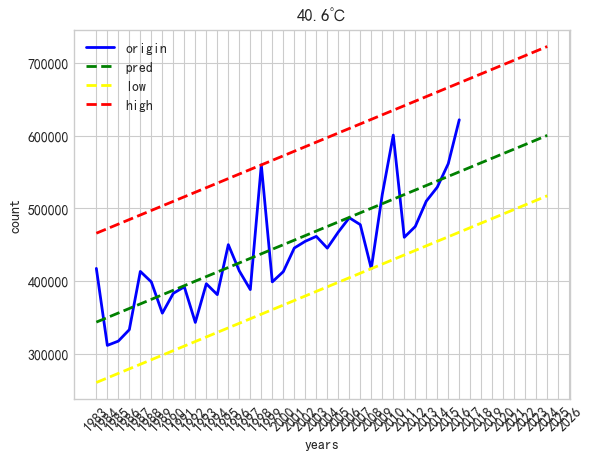

In [447]:
y2_406_low = []
for item in pred_past_406.tolist():
    y2_406_low.append(item - (pred_past_406.tolist()[25]-list(total_yeat_406.values())[25]))

y2_406_high = []
for item in pred_past_406.tolist():
    y2_406_high.append(item + (list(total_yeat_406.values())[15]-pred_past_406.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_yeat_406.values())
y2 = pred_past_406.tolist()
y3 = y2_406_low
y4 = y2_406_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('40.6℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [448]:
X_461 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_461 = year_461_scaled

# # Split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_461, y_461, test_size=0.2, random_state=0)

# train with model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction 
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_461 = regressor.predict(data)

prediction_copies_array_461 = np.repeat(y_pred_461,1, axis=-1)
pred_past_461=scaler.inverse_transform(np.reshape(prediction_copies_array_461,(len(y_pred_461),1)))[:,0]

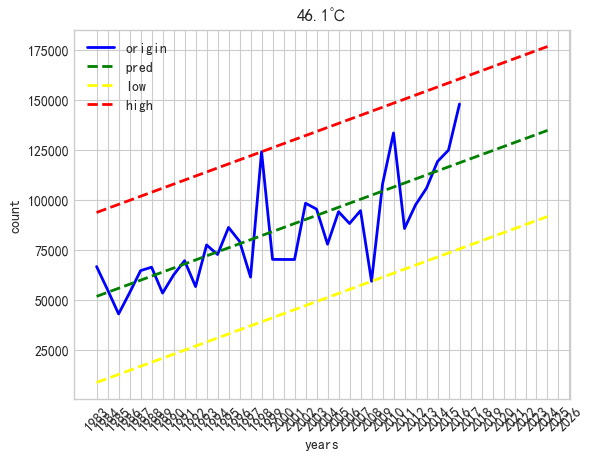

In [449]:
y2_461_low = []
for item in pred_past_461.tolist():
    y2_461_low.append(item - (pred_past_461.tolist()[25]-list(total_yeat_461.values())[25]))

y2_461_high = []
for item in pred_past_461.tolist():
    y2_461_high.append(item + (list(total_yeat_461.values())[15]-pred_past_461.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_yeat_461.values())
y2 = pred_past_461.tolist()
y3 = y2_461_low
y4 = y2_461_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('46.1℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

# Calculate how many people are exposed to high temperatures globally each year, projecting data for later years

In [ ]:
#Load the data, combine people_days of the same year according to the year

In [450]:
exp_28 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax28-tabular/wbgtmax28_EXP.csv')
people = exp_28.groupby('year')['people_days'].sum()
total_people_28 = people.to_dict()

In [451]:
exp_30 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax30-tabular/wbgtmax30_EXP.csv')
people = exp_30.groupby('year')['people_days'].sum()
total_people_30 = people.to_dict()

In [452]:
exp_32 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/wbgtmax32-tabular/wbgtmax32_EXP.csv')
people = exp_32.groupby('year')['people_days'].sum()
total_people_32 = people.to_dict()

In [453]:
exp_461 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/himax461-tabular/himax461_EXP.csv')
people = exp_461.groupby('year')['people_days'].sum()
total_people_461 = people.to_dict()

In [454]:
exp_406 = pd.read_csv('./sdei-high-res-daily-uhe-1983-2016-csv-json/sdei-high-res-daily-uhe-1983-2016-csv-json/himax406_2d-tabular/himax406_2d_EXP.csv')
people = exp_406.groupby('year')['people_days'].sum()
total_people_406 = people.to_dict()

In [ ]:
#plot line charts of five sets of data

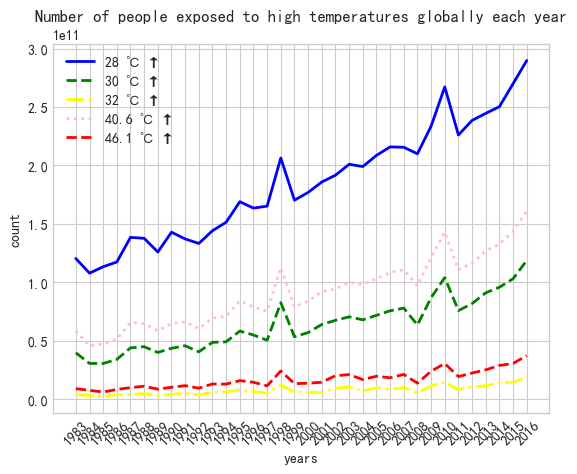

In [455]:
x = [i for i in range(1983, 2017)]
y1 = list(total_people_28.values())
y2 = list(total_people_30.values())
y3 = list(total_people_32.values())
y4 = list(total_people_406.values())
y5 = list(total_people_461.values())

plt.plot(x, y1, label='28 ℃ ↑', color='blue', linewidth=2, linestyle='solid')
plt.plot(x, y2, label='30 ℃ ↑', color='green', linewidth=2, linestyle='dashed')
plt.plot(x, y3, label='32 ℃ ↑', color='yellow', linewidth=2, linestyle='dashdot')
plt.plot(x, y4, label='40.6 ℃ ↑', color='pink', linewidth=2, linestyle='dotted')
plt.plot(x, y5, label='46.1 ℃ ↑', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('Number of people exposed to high temperatures globally each year')
plt.legend()

plt.xticks([i for i in range(1983, 2017)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [456]:
scaler_people = MinMaxScaler(feature_range=(0,1))
people_28_scaled = scaler.fit_transform(np.array(list(total_people_28.values())).reshape(-1,1))
people_30_scaled = scaler.transform(np.array(list(total_people_30.values())).reshape(-1,1))
people_32_scaled = scaler.transform(np.array(list(total_people_32.values())).reshape(-1,1))
people_406_scaled = scaler.transform(np.array(list(total_people_406.values())).reshape(-1,1))
people_461_scaled = scaler.transform(np.array(list(total_people_461.values())).reshape(-1,1))

In [457]:
X_people_28 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_people_28 = people_28_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_people_28, y_people_28, test_size=0.2, random_state=0)

# training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_people_28 = regressor.predict(data)

prediction_people_copies_array_28 = np.repeat(y_pred_people_28,1, axis=-1)
pred_past_people_28=scaler.inverse_transform(np.reshape(prediction_people_copies_array_28,(len(y_pred_people_28),1)))[:,0]

# x1 = [i for i in range(1983, 2017)]
# x2 = [i for i in range(1983, 2025)]
# y1 = list(total_people_28.values())
# y2 = pred_past_people_28.tolist()

# plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
# plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')

# plt.xlabel('years')
# plt.ylabel('count')
# plt.title('Multiple Lines Plot')
# plt.legend()

# plt.xticks([i for i in range(1983, 2027)], rotation=45)
# # plt.yticks()

# plt.grid(True)

# plt.show()

In [ ]:
#plot predicted and true value as we did before

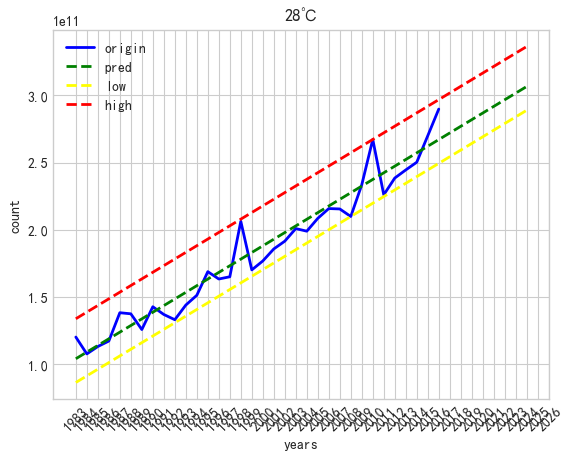

In [458]:
y2_people_28_low = []
for item in pred_past_people_28.tolist():
    y2_people_28_low.append(item - (pred_past_people_28.tolist()[25]-list(total_people_28.values())[25]))

y2_people_28_high = []
for item in pred_past_people_28.tolist():
    y2_people_28_high.append(item + (list(total_people_28.values())[27]-pred_past_people_28.tolist()[27]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_people_28.values())
y2 = pred_past_people_28.tolist()
y3 = y2_people_28_low
y4 = y2_people_28_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('28℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [459]:
X_people_30 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_people_30 = people_30_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_people_30, y_people_30, test_size=0.2, random_state=0)

# training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_people_30 = regressor.predict(data)

prediction_people_copies_array_30 = np.repeat(y_pred_people_30,1, axis=-1)
pred_past_people_30=scaler.inverse_transform(np.reshape(prediction_people_copies_array_30,(len(y_pred_people_30),1)))[:,0]

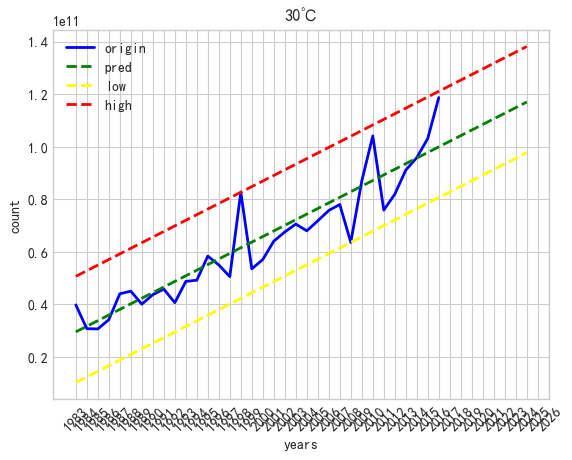

In [460]:
y2_people_30_low = []
for item in pred_past_people_30.tolist():
    y2_people_30_low.append(item - (pred_past_people_30.tolist()[25]-list(total_people_30.values())[25]))

y2_people_30_high = []
for item in pred_past_people_30.tolist():
    y2_people_30_high.append(item + (list(total_people_30.values())[15]-pred_past_people_30.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_people_30.values())
y2 = pred_past_people_30.tolist()
y3 = y2_people_30_low
y4 = y2_people_30_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('30℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [461]:
X_people_32 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_people_32 = people_32_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_people_32, y_people_32, test_size=0.2, random_state=0)

# training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction 
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_people_32 = regressor.predict(data)

prediction_people_copies_array_32 = np.repeat(y_pred_people_32,1, axis=-1)
pred_past_people_32=scaler.inverse_transform(np.reshape(prediction_people_copies_array_32,(len(y_pred_people_32),1)))[:,0]

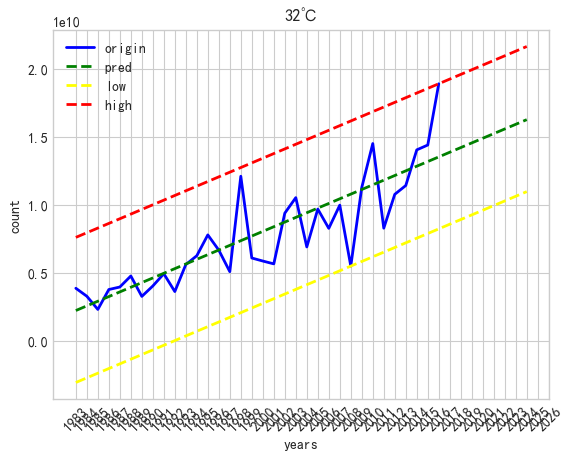

In [463]:
y2_people_32_low = []
for item in pred_past_people_32.tolist():
    y2_people_32_low.append(item - (pred_past_people_32.tolist()[25]-list(total_people_32.values())[25]))

y2_people_32_high = []
for item in pred_past_people_32.tolist():
    y2_people_32_high.append(item + (list(total_people_32.values())[33]-pred_past_people_32.tolist()[33]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_people_32.values())
y2 = pred_past_people_32.tolist()
y3 = y2_people_32_low
y4 = y2_people_32_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('32℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [464]:
X_people_406 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_people_406 = people_406_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_people_406, y_people_406, test_size=0.2, random_state=0)

# training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_people_406 = regressor.predict(data)

prediction_people_copies_array_406 = np.repeat(y_pred_people_406,1, axis=-1)
pred_past_people_406=scaler.inverse_transform(np.reshape(prediction_people_copies_array_406,(len(y_pred_people_406),1)))[:,0]

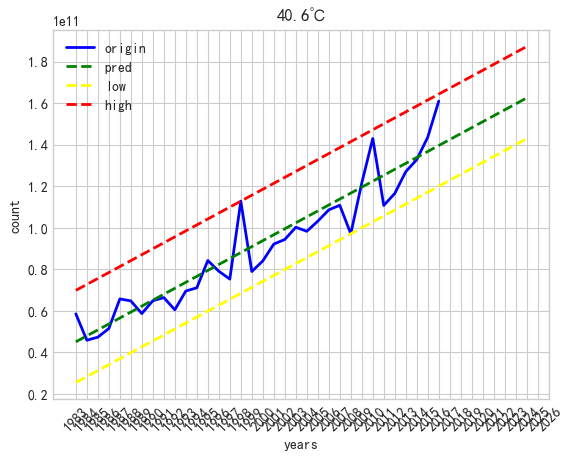

In [465]:
y2_people_406_low = []
for item in pred_past_people_406.tolist():
    y2_people_406_low.append(item - (pred_past_people_406.tolist()[25]-list(total_people_406.values())[25]))

y2_people_406_high = []
for item in pred_past_people_406.tolist():
    y2_people_406_high.append(item + (list(total_people_406.values())[15]-pred_past_people_406.tolist()[15]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_people_406.values())
y2 = pred_past_people_406.tolist()
y3 = y2_people_406_low
y4 = y2_people_406_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('40.6℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

In [466]:
X_people_461 = np.array([i for i in range(1983, 2017)]).reshape(-1,1)
y_people_461 = people_461_scaled

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_people_461, y_people_461, test_size=0.2, random_state=0)

# training model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Prediction
data = np.array([i for i in range(1983, 2025)]).reshape(-1,1)
y_pred_people_461 = regressor.predict(data)

prediction_people_copies_array_461 = np.repeat(y_pred_people_461,1, axis=-1)
pred_past_people_461=scaler.inverse_transform(np.reshape(prediction_people_copies_array_461,(len(y_pred_people_461),1)))[:,0]

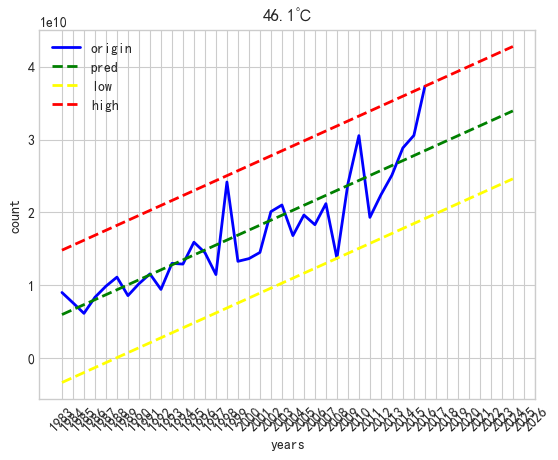

In [467]:
y2_people_461_low = []
for item in pred_past_people_461.tolist():
    y2_people_461_low.append(item - (pred_past_people_461.tolist()[25]-list(total_people_461.values())[25]))

y2_people_461_high = []
for item in pred_past_people_461.tolist():
    y2_people_461_high.append(item + (list(total_people_461.values())[33]-pred_past_people_461.tolist()[33]))

x1 = [i for i in range(1983, 2017)]
x2 = [i for i in range(1983, 2025)]
y1 = list(total_people_461.values())
y2 = pred_past_people_461.tolist()
y3 = y2_people_461_low
y4 = y2_people_461_high

plt.plot(x1, y1, label='origin', color='blue', linewidth=2, linestyle='solid')
plt.plot(x2, y2, label='pred', color='green', linewidth=2, linestyle='dashed')
plt.plot(x2, y3, label='low', color='yellow', linewidth=2, linestyle='dashed')
plt.plot(x2, y4, label='high', color='red', linewidth=2, linestyle='dashed')

plt.xlabel('years')
plt.ylabel('count')
plt.title('46.1℃')
plt.legend()

plt.xticks([i for i in range(1983, 2027)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

# Calculate how many people are exposed to high temperatures in each region each year

In [ ]:
#Combine data by year and region

In [468]:
region_28 = exp_28.groupby(['year', 'intermediate-region']).sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3866184859.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_28 = exp_28.groupby(['year', 'intermediate-region']).sum().reset_index()


In [469]:
region_30 = exp_30.groupby(['year', 'intermediate-region']).sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3321381607.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_30 = exp_30.groupby(['year', 'intermediate-region']).sum().reset_index()


In [470]:
region_32 = exp_32.groupby(['year', 'intermediate-region']).sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\924519152.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_32 = exp_32.groupby(['year', 'intermediate-region']).sum().reset_index()


In [471]:
region_406 = exp_406.groupby(['year', 'intermediate-region']).sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3977875602.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_406 = exp_406.groupby(['year', 'intermediate-region']).sum().reset_index()


In [472]:
region_461 = exp_461.groupby(['year', 'intermediate-region']).sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\1548634585.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_461 = exp_461.groupby(['year', 'intermediate-region']).sum().reset_index()


In [473]:
output_dict = {}

In [ ]:
#Generate a dict. See the output_dict output in the following line for the dictionary format. Note that the results of each piece of data above have been added here, not only region_461. It is not displayed because output_dict is defined in the previous line. I directly put the region_461.iterrows() of this line In the region_461 changed to region_28, region_30 executed 5 times

In [474]:
for _, row in region_461.iterrows():
    if row['intermediate-region'] not in output_dict:
        output_dict[row['intermediate-region']] = {row['year']: row['people_days']}
    else:
        if row['year'] not in output_dict[row['intermediate-region']]:
            output_dict[row['intermediate-region']][row['year']] = row['people_days']
        else:
            output_dict[row['intermediate-region']][row['year']] += row['people_days']

In [475]:
output_dict

{'Australia and New Zealand': {1983: 120196.0588272095,
  1984: 0.0,
  1985: 123620.7632369995,
  1986: 0.0,
  1987: 63522.7338233948,
  1988: 0.0,
  1989: 0.0,
  1990: 0.0,
  1991: 0.0,
  1992: 135084.5698028565,
  1993: 0.0,
  1994: 523147.7387268068,
  1995: 209156.4571723938,
  1996: 0.0,
  1997: 971513.0960973318,
  1998: 0.0,
  1999: 0.0,
  2000: 0.0,
  2001: 149188.8331329346,
  2002: 151684.9142974853,
  2003: 0.0,
  2004: 2118474.1297692177,
  2005: 0.0,
  2006: 187902.2832194328,
  2007: 0.0,
  2008: 0.0,
  2009: 172799.5579986573,
  2010: 0.0,
  2011: 0.0,
  2012: 0.0,
  2013: 566248.5065824192,
  2014: 1155571.364758858,
  2015: 92066.9847183228,
  2016: 0.0},
 'Central America': {1983: 75989160.82177599,
  1984: 45866088.50464506,
  1985: 33321447.713964727,
  1986: 41990629.01642623,
  1987: 44945892.5345524,
  1988: 40425128.23952487,
  1989: 72931337.79762278,
  1990: 60512352.42380228,
  1991: 35074723.323902935,
  1992: 68404194.58630508,
  1993: 49337828.57511325,
  

In [ ]:
#plot the number of people exposed to heat each year for each region

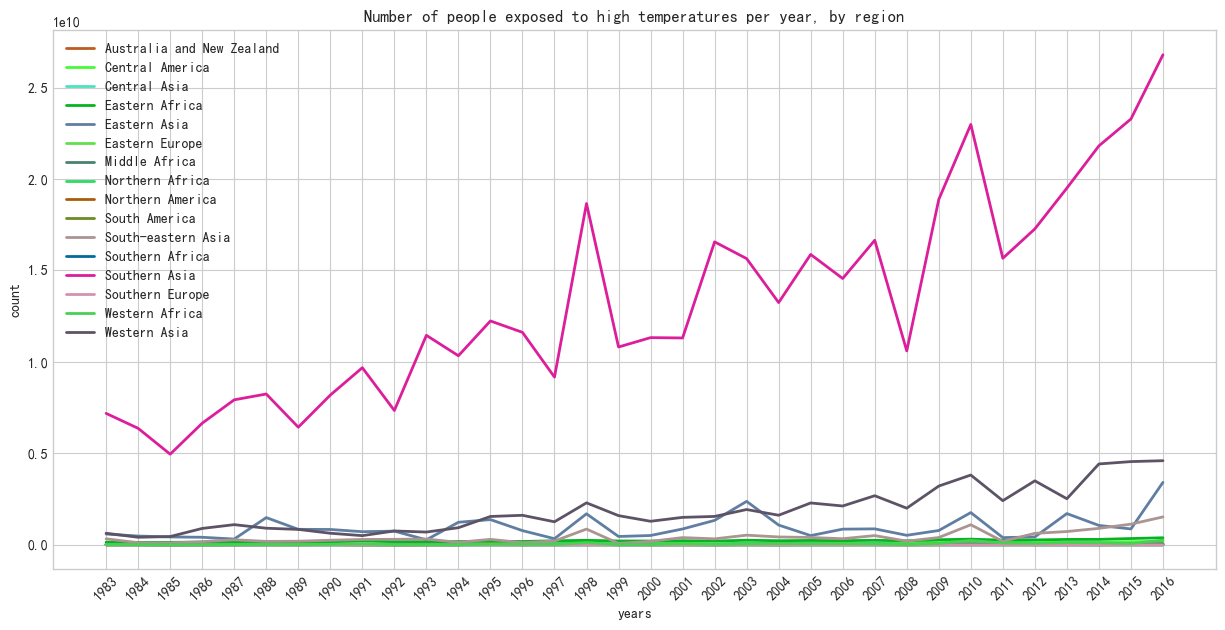

In [482]:
import random

x = [i for i in range(1983, 2017)]
y_label = list(output_dict.keys())
y_list = []
for label in y_label:
    y_list.append(list(output_dict[label].values()))

plt.figure(figsize=(15, 7))
for i in range(len(y_list)):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    color = '#{:02x}{:02x}{:02x}'.format(r, g, b)
    plt.plot(x, y_list[i], label=y_label[i], color=color, linewidth=2, linestyle='solid')

plt.xlabel('years')
plt.ylabel('count')
plt.title('Number of people exposed to high temperatures per year, by region')
plt.legend()

plt.xticks([i for i in range(1983, 2017)], rotation=45)
# plt.yticks()

plt.grid(True)

plt.show()

# Number of deaths due to projected temperatures and duration of high temperatures

In [483]:
from datetime import datetime
from xgboost import XGBRegressor
import seaborn as sns
death = pd.read_csv('emdat_public_2023_08_19_query_uid-um2D3M.csv')
death.head()

,Year,Country,Region,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths
0,1936,Canada,Northern America,NaN,1936,7,6.0,1936,7,6.0,500.0
1,1953,India,Southern Asia,NaN,1953,6,NaN,1953,6,NaN,400.0
2,1958,India,Southern Asia,NaN,1958,5,NaN,1958,5,NaN,651.0
3,1965,India,Southern Asia,NaN,1965,6,NaN,1965,6,NaN,100.0
4,1968,Brazil,South America,NaN,1968,12,NaN,1968,12,NaN,113.0


In [484]:
death = death.dropna()
# Calculate how long the event lasts (default year is 2020, assuming all events occur in the same year)
death['Duration'] = death.apply(lambda row: (datetime(int(row['End Year']), int(row['End Month']), int(row['End Day'])) - 
                                               datetime(int(row['Start Year']), int(row['Start Month']), int(row['Start Day']))).days +1,axis=1)
death

,Year,Country,Region,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Duration
21,1987,Greece,Southern Europe,41.0,1987,7,20.0,1987,7,31.0,1000.0,12
26,1980,India,Southern Asia,40.0,1980,4,29.0,1980,4,29.0,50.0,1
28,1985,India,Southern Asia,46.0,1985,6,6.0,1985,6,6.0,103.0,1
39,1990,France,Western Europe,40.0,1990,7,24.0,1990,7,24.0,5.0,1
41,1991,Pakistan,Southern Asia,53.0,1991,6,1.0,1991,6,15.0,523.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
230,2022,France,Western Europe,42.0,2022,5,30.0,2022,9,4.0,4807.0,98
231,2022,United Kingdom of Great Britain and Northern I...,Northern Europe,40.0,2022,5,30.0,2022,9,4.0,3469.0,98
238,2022,Japan,Eastern Asia,37.0,2022,6,20.0,2022,7,1.0,80.0,12
245,2022,Portugal,Southern Europe,47.0,2022,5,30.0,2022,9,4.0,2212.0,98


In [ ]:
# drop irrelevant columns

In [360]:
death.drop(['Start Year','Start Month','Start Day', 'End Year', 'End Month', 'End Day'], axis=1, inplace=True)

In [ ]:
# The country and region columns are strings and cannot be input for model training. Here, one-hot encoding is used

In [361]:
one_hot_Country = pd.get_dummies(death[['Country']])
death = pd.merge(death, one_hot_Country, left_index=True, right_index=True)
death.head()

,Year,Country,Region,Dis Mag Value,Total Deaths,Duration,Country_Algeria,Country_Australia,Country_Bangladesh,Country_Belgium,...,Country_Netherlands (the),Country_Pakistan,Country_Portugal,Country_Romania,Country_Slovakia,Country_South Africa,Country_Spain,Country_Sudan (the),Country_United Kingdom of Great Britain and Northern Ireland (the),Country_United States of America (the)
21,1987,Greece,Southern Europe,41.0,1000.0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1980,India,Southern Asia,40.0,50.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1985,India,Southern Asia,46.0,103.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,1990,France,Western Europe,40.0,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,1991,Pakistan,Southern Asia,53.0,523.0,15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [362]:
one_hot_Region = pd.get_dummies(death[['Region']])
death = pd.merge(death, one_hot_Region, left_index=True, right_index=True)
death.head()

,Year,Country,Region,Dis Mag Value,Total Deaths,Duration,Country_Algeria,Country_Australia,Country_Bangladesh,Country_Belgium,...,Region_Eastern Asia,Region_Eastern Europe,Region_Northern Africa,Region_Northern America,Region_Northern Europe,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Western Asia,Region_Western Europe
21,1987,Greece,Southern Europe,41.0,1000.0,12,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26,1980,India,Southern Asia,40.0,50.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28,1985,India,Southern Asia,46.0,103.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39,1990,France,Western Europe,40.0,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41,1991,Pakistan,Southern Asia,53.0,523.0,15,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Spliting test set and training set

In [363]:
X = death.drop(columns=['Total Deaths', 'Country', 'Region'])
y = death['Total Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [ ]:
# training with XGBoost

In [364]:
model = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=160, objective='reg:gamma')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=160, n_jobs=None, num_parallel_tree=None,
             objective='reg:gamma', predictor=None, ...)

In [ ]:
# Output the importance of each feature

In [366]:
features = X.columns
importances = model.feature_importances_
importances_df = pd.DataFrame()
importances_df["feature name"] = features
importances_df['importance'] = importances
importances_df.sort_values("importance", ascending=False)

,feature name,importance
2,Duration,0.086607
16,Country_India,0.078827
39,Region_Western Europe,0.073747
33,Region_Northern America,0.069495
32,Region_Northern Africa,0.062151
18,Country_Japan,0.061846
22,Country_Romania,0.054879
17,Country_Italy,0.054049
37,Region_Southern Europe,0.052193
28,Country_United States of America (the),0.048239


In [ ]:
#Draw a heat map, the darker the color, the deeper the correlation between the features corresponding to the horizontal and vertical axes

C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3816785630.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # Setting the drawing style
C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3816785630.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(death.corr(),dtype=np.bool_)
C:\Users\asus\AppData\Local\Temp\ipykernel_25656\3816785630.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_onl

<Axes: >

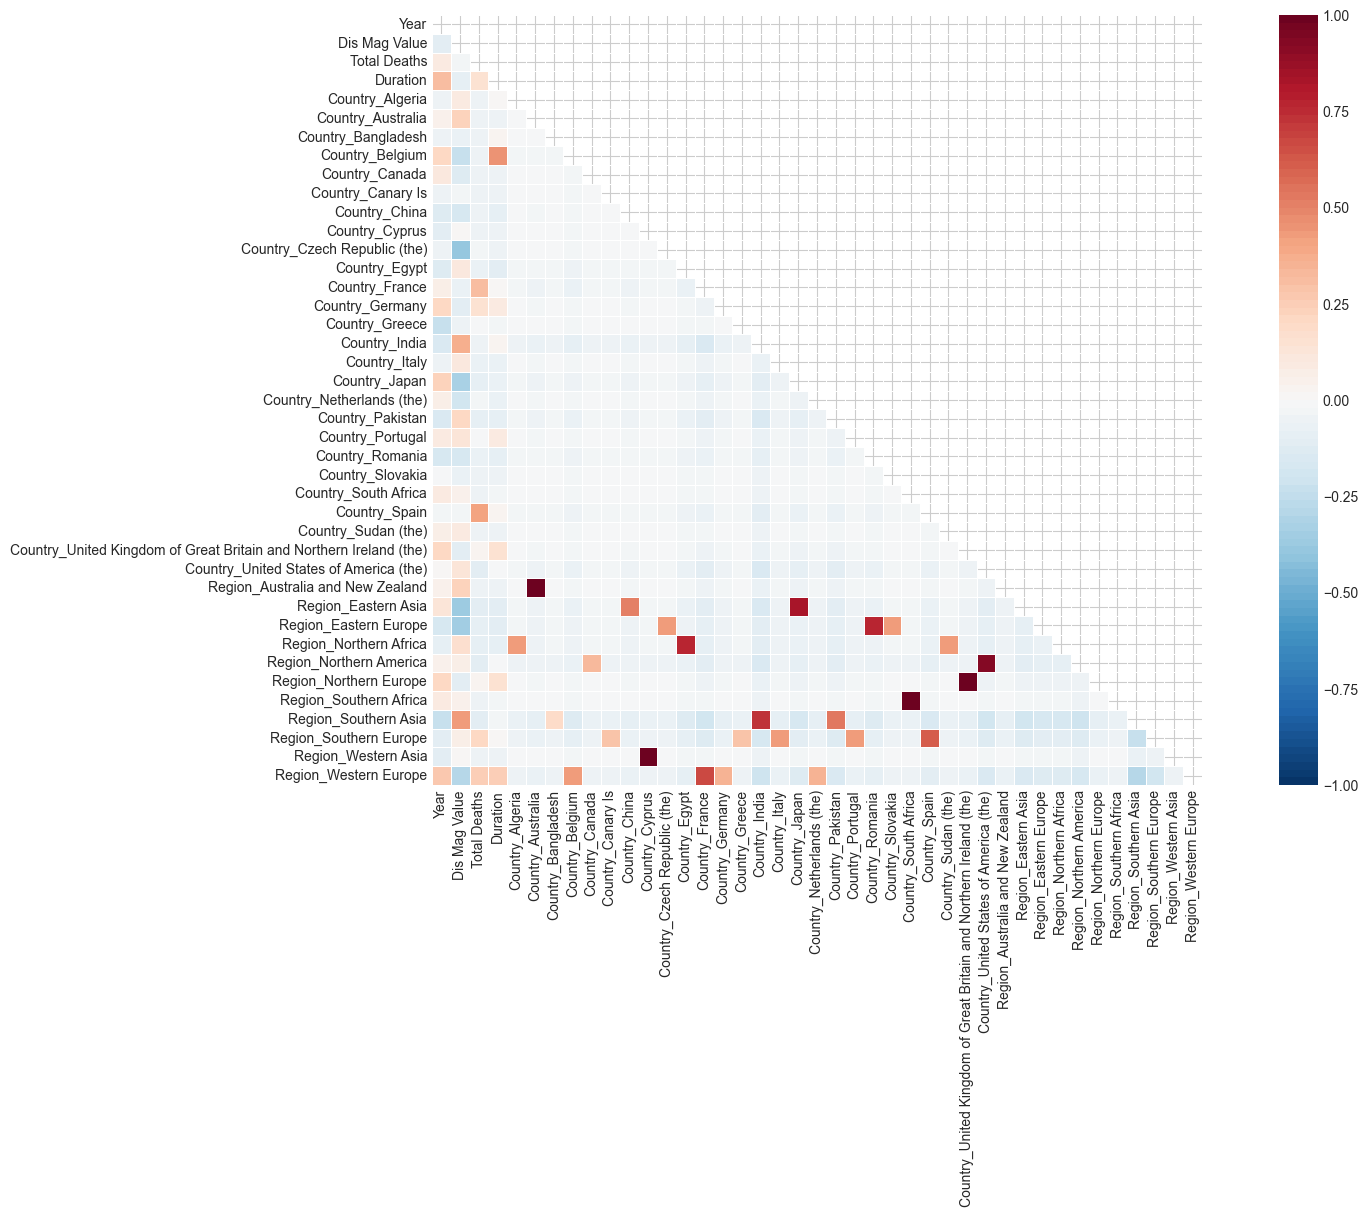

In [367]:
# Heat mapping
plt.style.use('seaborn-whitegrid')  # Setting the drawing style
fig = plt.figure(figsize=(20,10))

# Create a boolean array based on the feature correlation of accidents_con
mask = np.zeros_like(death.corr(),dtype=np.bool_)  
# Set the value of the index position of the upper triangular matrix in mask to True 
# (the purpose is to hide the upper triangular part when drawing)
mask[np.triu_indices_from(mask)] = True  
# Heat map of feature relationships
sns.heatmap(death.corr(),
            vmin=-1,vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r",100),
            mask=mask,
            linewidths=.5)

# Counting the hottest temperatures of each year

In [ ]:
# According to the combination data in years, find the maximum value of avg_temp

In [373]:
max_temp = data_461.groupby('year')['avg_temp'].max()

In [ ]:
# Draw a histogram of the global mean maximum temperature in years

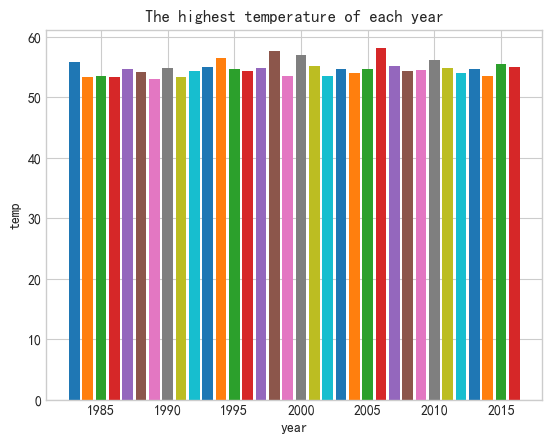

In [391]:
x_data = [i for i in range(1983, 2017)]
y_data = max_temp.tolist()

for i in range(len(x_data)):
    plt.bar(x_data[i], y_data[i])
plt.title("The highest temperature of each year")
plt.xlabel("year")
plt.ylabel("temp")
plt.show()

# Statistics on the number of days of high temperatures per year

In [ ]:
#Compute the sum of durations based on year combined data

In [400]:
duration_28 = data_28.groupby('year')['duration'].sum()

In [401]:
duration_30 = data_30.groupby('year')['duration'].sum()

In [402]:
duration_32 = data_32.groupby('year')['duration'].sum()

In [403]:
duration_406 = data_406.groupby('year')['duration'].sum()

In [404]:
duration_461 = data_461.groupby('year')['duration'].sum()

In [ ]:
# Plot the total number of hot weather in all regions of the world for each year

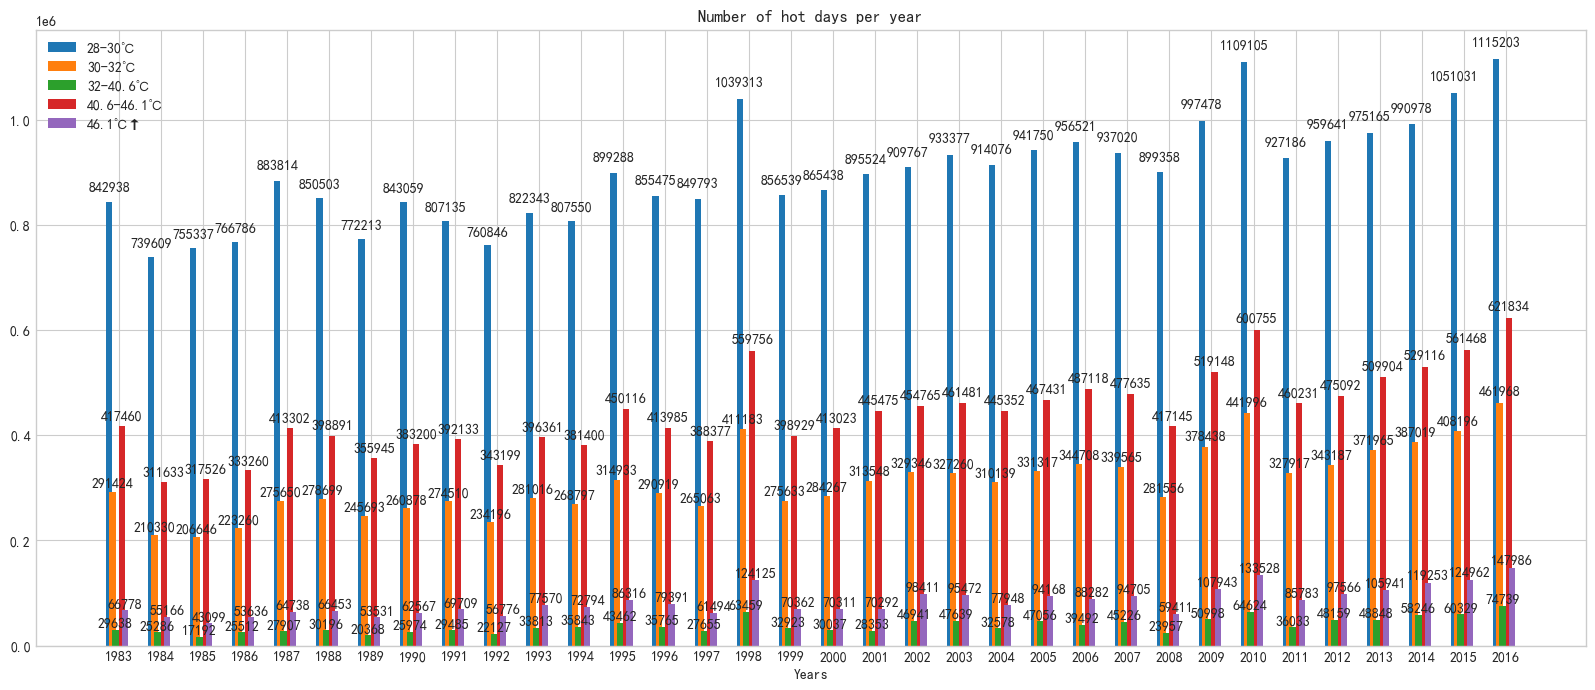

In [415]:
# Sample data
labels = [i for i in range(1983, 2017)]
values1 = duration_28.tolist()
values2 = duration_30.tolist()
values3 = duration_32.tolist()
values4 = duration_406.tolist()
values5 = duration_461.tolist()


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(x - width - width/2, values1, width, label='28-30℃')
rects2 = ax.bar(x - width, values2, width, label='30-32℃')
rects3 = ax.bar(x - width/2, values3, width, label='32-40.6℃')
rects4 = ax.bar(x + width/2, values4, width, label='40.6-46.1℃')
rects5 = ax.bar(x + width, values5, width, label='46.1℃↑')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_title('Number of hot days per year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Call function to add text labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()